link to Data Description : https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbkx01.htm#1.HEADING

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def wrangle(filepath):
    
    df = pd.read_csv(filepath)
    
    return df

In [4]:
df = wrangle("SCFP2019.csv")

mask = df["TURNFEAR"] == 1
df_fear = df[mask]

In [5]:
print("df_fear shape:", df_fear.shape)
df_fear.head()

df_fear shape: (4623, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


# AGE

In [6]:
df_fear["AGECL"].head()
age_groups = df_fear["AGECL"].unique()
print("Age groups:", age_groups)

Age groups: [3 5 1 2 4 6]


In [7]:
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75or older", 
}
age_cl = df_fear["AGECL"].replace(agecl_dict)
age_cl.head()

5    45-54
6    45-54
7    45-54
8    45-54
9    45-54
Name: AGECL, dtype: object

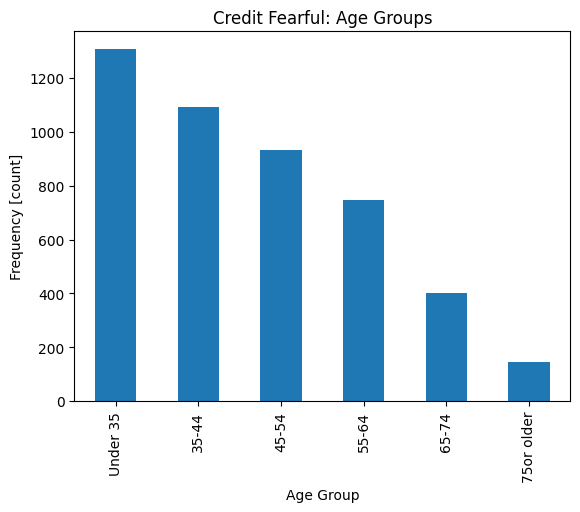

In [8]:
age_cl.value_counts().plot(kind = "bar",
                          xlabel = "Age Group",
                          ylabel = "Frequency [count]",
                          title = "Credit Fearful: Age Groups");

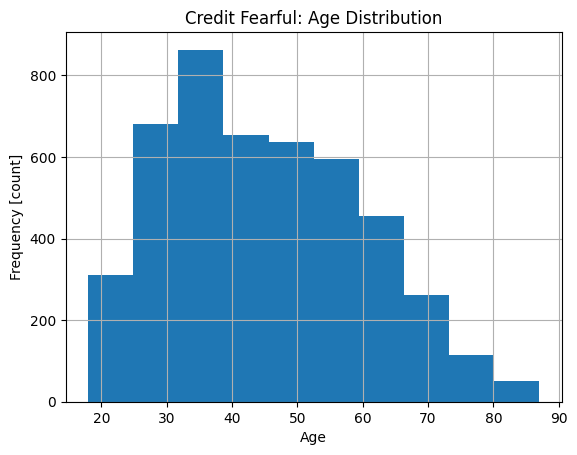

In [9]:
df_fear["AGE"].hist(bins = 10)
plt.xlabel("Age")
plt.ylabel("Frequency [count]")
plt.title("Credit Fearful: Age Distribution");

This shows that most of the credit fearful households are between their 30's and 40's

# RACE

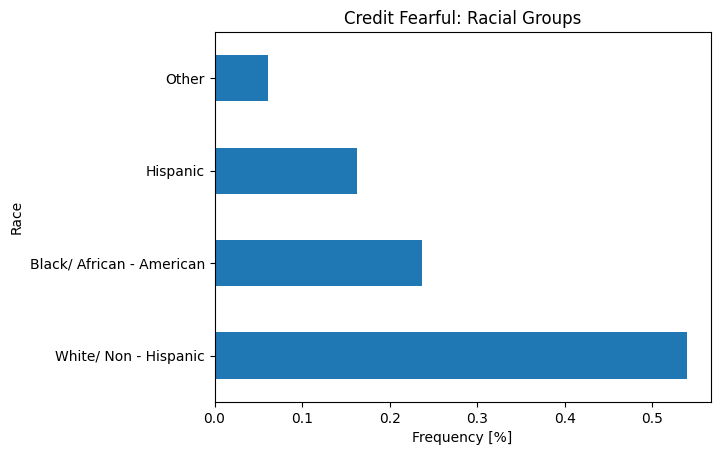

In [10]:
race_dict = {
    1: "White/ Non - Hispanic",
    2: "Black/ African - American",
    3: "Hispanic",
    5: "Other"
}
race = df_fear["RACE"].replace(race_dict)

race.value_counts(normalize = True).plot(kind = "barh")
#plt.xlim((0,1))
plt.xlabel("Frequency [%]")
plt.ylabel("Race")
plt.title("Credit Fearful: Racial Groups");

In [11]:
scf_respondent = df["RACE"].replace(race_dict).value_counts(normalize = True).rename("scf_respondent")
credit_fear = df_fear["RACE"].replace(race_dict).value_counts(normalize = True).rename("credit_fear")

race_df = pd.DataFrame(data=[scf_respondent, credit_fear])
race_df.head()

RACE,White/ Non - Hispanic,Black/ African - American,Hispanic,Other
scf_respondent,0.716739,0.130068,0.096625,0.056569
credit_fear,0.539477,0.237508,0.162232,0.060783


This suggests that White/Non-Hispanic people worry more about being denied credit, but thinking critically about what we're seeing, that might be because there are more White/Non-Hispanic in the population of the United States than there are other racial groups, and the sample for this survey was specifically drawn to be representative of the population as a whole.

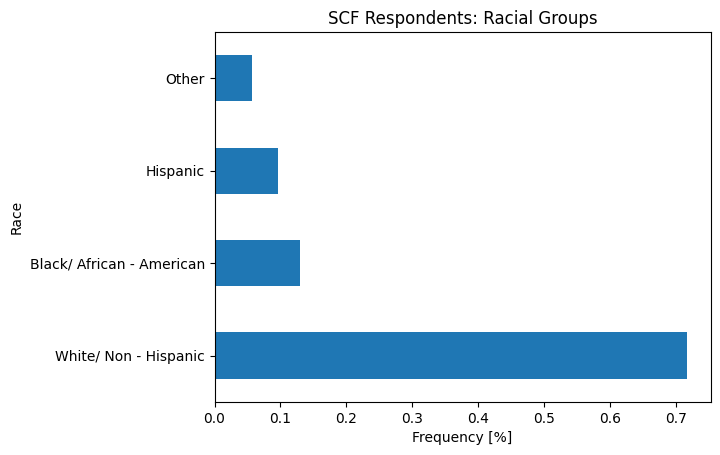

In [12]:

race = df["RACE"].replace(race_dict)

race.value_counts(normalize = True).plot(kind = "barh")
#plt.xlim((0,1))
plt.xlabel("Frequency [%]")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

# INCOME

In [13]:
# INCOME

inccat_dict = {
    1: "0-19.9",
    2: "20-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}
inccat = (df["INCCAT"].replace(inccat_dict).groupby(df["TURNFEAR"]).value_counts(normalize = True)
          .rename("frequency").to_frame().reset_index()
         )

inccat

,TURNFEAR,INCCAT,frequency
0,0,90-100,0.297296
1,0,60-79.9,0.174841
2,0,40-59.9,0.143146
3,0,0-19.9,0.140343
4,0,20-39.9,0.135933
5,0,80-89.9,0.108441
6,1,0-19.9,0.288125
7,1,20-39.9,0.256327
8,1,40-59.9,0.228856
9,1,60-79.9,0.132598


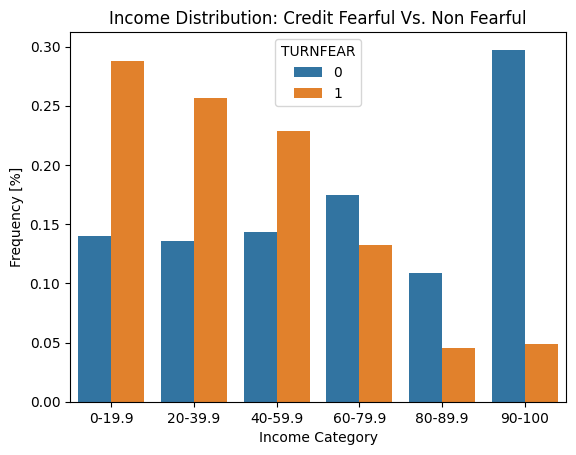

In [14]:
sns.barplot(x = "INCCAT", y = "frequency", 
           data = inccat, hue = "TURNFEAR",
           order = inccat_dict.values())
plt.xlabel("Income Category")
plt.ylabel("Frequency [%]")
plt.title("Income Distribution: Credit Fearful Vs. Non Fearful");

# ASSET

In [15]:
asset_house_corr = df["ASSET"].corr(df["HOUSES"])
asset_house_fear_corr = df_fear["ASSET"].corr(df_fear["HOUSES"])
print("SCF Respondent asset house corr", asset_house_corr)
print("Credit Fearful asset house corr", asset_house_fear_corr)

SCF Respondent asset house corr 0.5198273544779253
Credit Fearful asset house corr 0.583287973597916


In [17]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df[cols].corr()
corr.style.background_gradient(axis = None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.519827,0.622429,0.261250,0.116673
HOUSES,0.519827,1.000000,0.247852,0.266661,0.169300
INCOME,0.622429,0.247852,1.000000,0.114646,0.069400
DEBT,0.261250,0.266661,0.114646,1.000000,0.054179
EDUC,0.116673,0.169300,0.069400,0.054179,1.000000


In [18]:
corr = df_fear[cols].corr()
corr.style.background_gradient(axis = None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.583288,0.722074,0.474658,0.113536
HOUSES,0.583288,1.000000,0.264099,0.962629,0.160348
INCOME,0.722074,0.264099,1.000000,0.172393,0.133170
DEBT,0.474658,0.962629,0.172393,1.000000,0.177386
EDUC,0.113536,0.160348,0.133170,0.177386,1.000000


Whoa! There are some pretty important differences here! The relationship between "DEBT" and "HOUSES" is positive for both datasets, but while the coefficient for df is fairly weak at 0.26, the same number for df_fear is 0.96.

Remember, the closer a correlation coefficient is to 1.0, the more exactly they correspond. In this case, that means the value of the primary residence and the total debt held by the household is getting pretty close to being the same. This suggests that the main source of debt being carried by our "TURNFEAR" folks is their primary residence, which, again, is an intuitive finding.

"DEBT" and "ASSET" share a similarly striking difference, as do "EDUC" and "DEBT" which, while not as extreme a contrast as the other, is still big enough to catch the interest of our hypothetical banker.

Let's make some visualizations to show these relationships graphically.

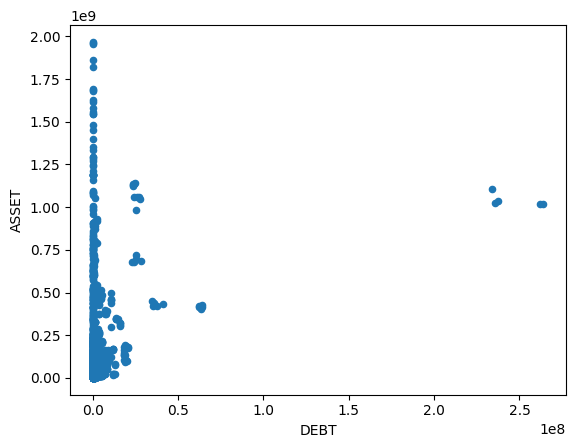

In [19]:
df.plot.scatter(x = "DEBT", y = "ASSET");

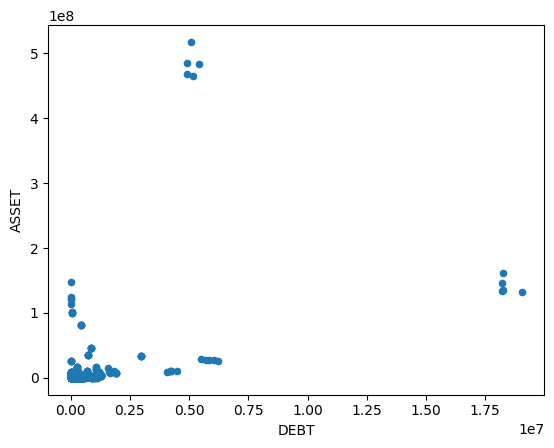

In [20]:
df_fear.plot.scatter(x = "DEBT", y = "ASSET");

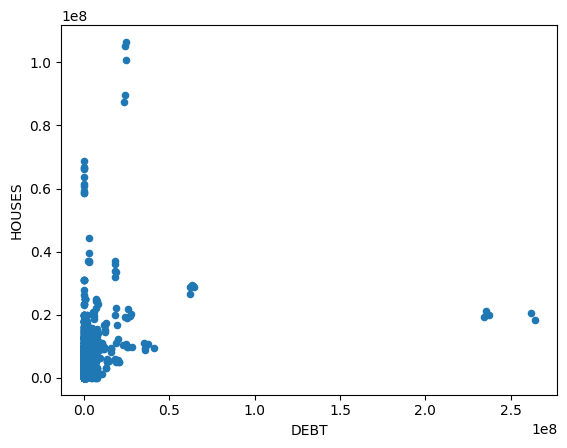

In [21]:
df.plot.scatter(x = "DEBT", y = "HOUSES");

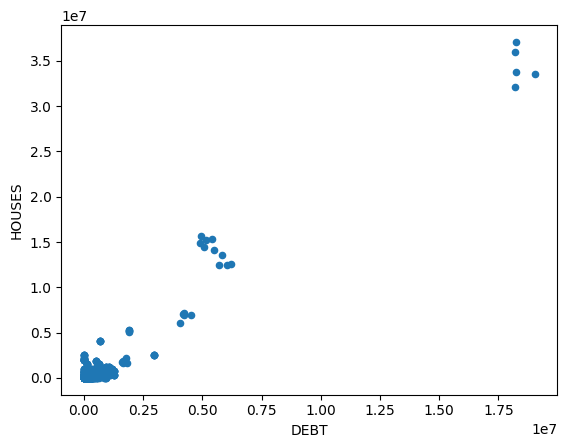

In [22]:
df_fear.plot.scatter(x = "DEBT", y = "HOUSES");

# EDUCATION

In [23]:
df_educ = df["EDUC"].groupby(df["TURNFEAR"]).value_counts(normalize = True).rename("frequency").to_frame().reset_index()
df_educ.head()

,TURNFEAR,EDUC,frequency
0,0,12,0.257481
1,0,8,0.192029
2,0,13,0.149823
3,0,9,0.129833
4,0,14,0.096117


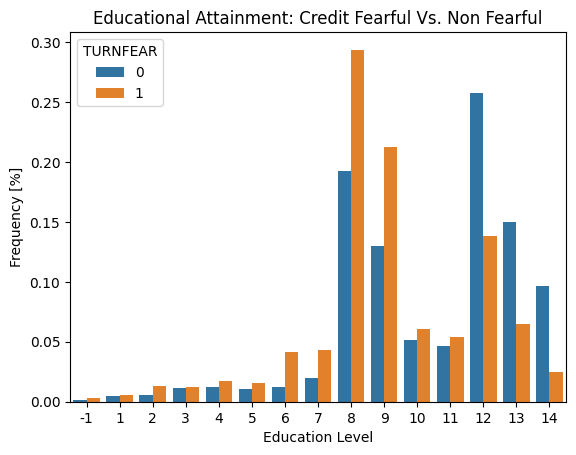

In [24]:
sns.barplot(x = "EDUC", y = "frequency", 
           data = df_educ, hue = "TURNFEAR",
           )
plt.xlabel("Education Level")
plt.ylabel("Frequency [%]")
plt.title("Educational Attainment: Credit Fearful Vs. Non Fearful");